In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
#Loading the wine data and adding names of columns
data = pd.read_table('wine.data', sep=",", header=None, index_col = None 
                   ,names = ["Class", "Alcohol", "Malic acid", "Ash"
                    ,"Alcalinity of ash","Magnesium","Total phenols"
                    ,"Flavanoids","Nonflavanoid phenols","Proanthocyanins"
                    ,"Color Intensity","Hue","OD280/OD315 of diluted wines","Proline"]);

In [3]:
#Function for choosing number of columns for analysis
def set_X(n):
    X = data.iloc[:,1:n+1]
    return X 
#Class vector 
y = data.iloc[:,0]

ALL = 13; 

In [4]:
#Function for counting all components for PCA method
def std_PCA(dane,min_range,max_range) :
    std = []
    for i in range(min_range,max_range):
        pca = PCA(n_components=i)
        pca.fit(dane)
        x_pca = pca.transform(dane)
        std.append(x_pca.std())
    return std

In [5]:
std_PCA(set_X(ALL),1,14)

[314.0771817455471,
 222.2791511370932,
 181.49878525860373,
 157.18650569413126,
 140.59275388932966,
 128.34358091318762,
 118.82323364439641,
 111.1490421161973,
 104.79238096445393,
 99.41481744366519,
 94.78832716707198,
 90.7529235490666,
 87.1925922003644]

We see that std values are quite big, the reason is that values in wine dataset are diffrent and in case of that we need to rescale them 

In [12]:
#Scaling the data
scaler = StandardScaler()
scaler.fit(set_X(ALL))
scaled_wine= scaler.transform(set_X(ALL))

In [13]:
#All principal components
std_PCA(scaled_wine,1,14)

[2.169297179500869,
 1.8977386525021818,
 1.69792971547844,
 1.5465986777334086,
 1.4436826561416627,
 1.3578632165845574,
 1.2880651825598841,
 1.2228185047744438,
 1.1667219371466513,
 1.1181262535950864,
 1.0756753409110242,
 1.036686310008685,
 1.0000000000000002]

In [8]:
#Cumulated standard deviation
sum_std = [sum(std_PCA(scaled_wine,1,14)[:i]) for i in range(1,14)]

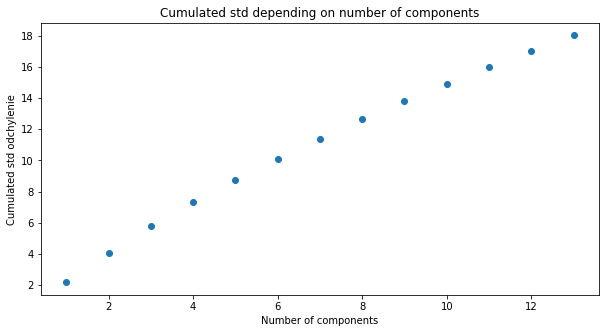

In [14]:
#Chart of cumulated standard deviation in function of nubmer of components
plt.figure(figsize=(10,5))
plt.scatter(list(range(1,14)),sum_std)
plt.xlabel('Number of components')
plt.ylabel('Cumulated std odchylenie')
plt.title("Cumulated std depending on number of components")
plt.show()

In [10]:
#PCA for 3 components in need to analize 1 with 2 and 2 with 3 
pca = PCA(n_components=3)
x_pca = pca.fit(scaled_wine)
x_pca = pca.transform(scaled_wine)

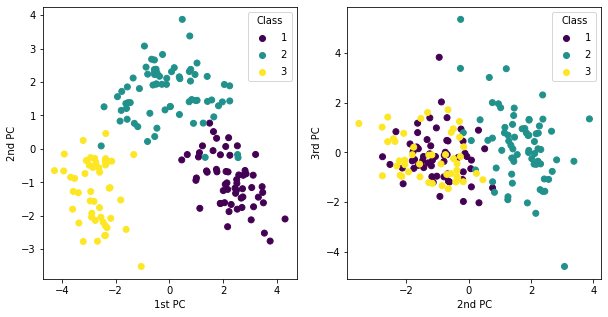

In [16]:
#1st and 2nd principal components analysis 
fig, ax = plt.subplots(1,2,figsize=(10,5))
ax1s = ax[0].scatter(x_pca[:,0],x_pca[:,1],c=y)
ax[0].set_xlabel('1st PC')
ax[0].set_ylabel('2nd PC')
ax[0].legend(*ax1s.legend_elements(), title="Class")
#2nd and 3rd principal components analysis 
ax2s = ax[1].scatter(x_pca[:,1],x_pca[:,2],c=y)
ax[1].set_xlabel('2nd PC')
ax[1].set_ylabel('3rd PC')
ax[1].legend(*ax2s.legend_elements(), title="Class")
plt.show()

The graph for the 1st and 2nd principal components shows that the class points are separable and the use of this method makes sense. The graph for the 2nd and 3rd principal component does not show a separation of points from classes 1 and 3, which proves that this method is not very effective, where we take into account major components other than 1 and 2.